<a href="https://colab.research.google.com/github/Ankit-07-chy/Data-Science/blob/main/270_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# HyperParameter Tuning


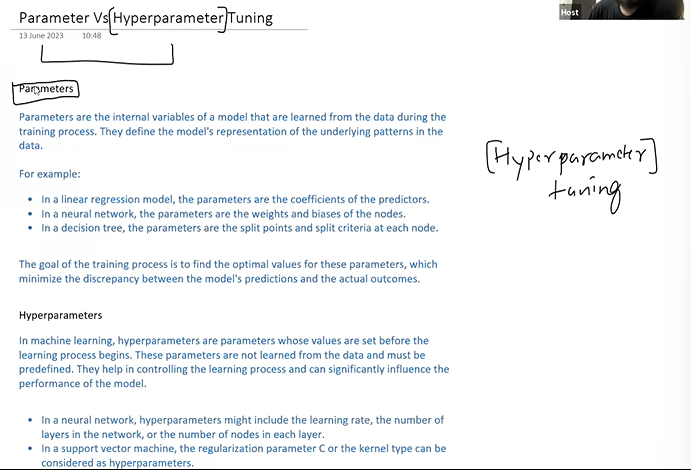

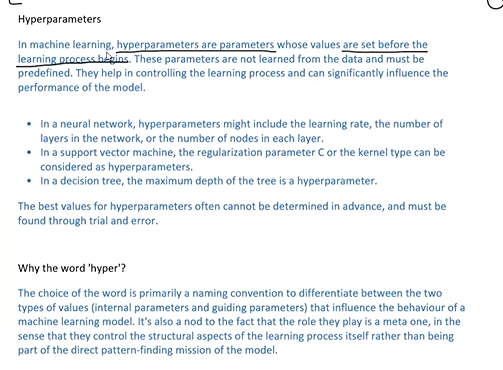

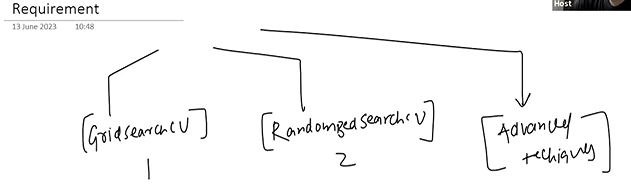

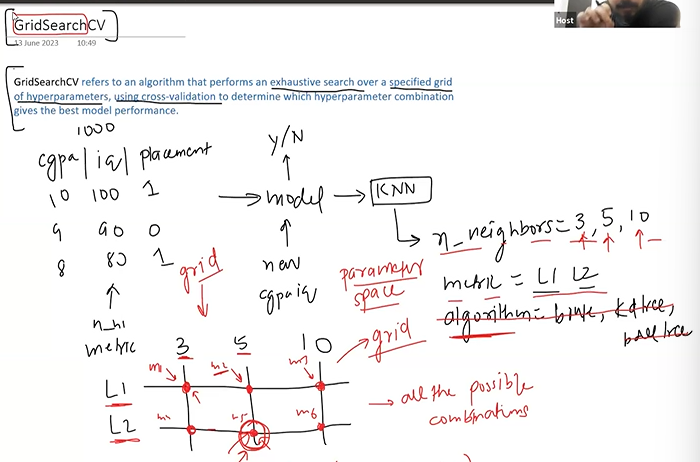Grid

In [8]:
# implimentation for gridsearch cv

link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(link,header=None)
df.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
              'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
              'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
              'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
              'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
              'fractal_dimension_se', 'radius_worst', 'texture_worst',
              'perimeter_worst', 'area_worst', 'smoothness_worst',
              'compactness_worst', 'concavity_worst', 'concave_points_worst',
              'symmetry_worst', 'fractal_dimension_worst']

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [13]:
y = df.iloc[:,1]
x = df.iloc[:,2:]

In [14]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

kfold = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(knn,x,y,cv=kfold)

In [19]:
scores.mean()

np.float64(0.9191274646793977)

In [21]:
# Grid search cv
from sklearn.model_selection import GridSearchCV


In [22]:
knn = KNeighborsClassifier()

In [23]:
param_grid = {
    'n_neighbors':[1,3,5,7,10,12,15,17,21],
    'weights':['uniform','distance'],
    'algorithm':['ball_tree','kd_tree','brute'],
    'p':[1,2]
}

In [28]:
gcv = GridSearchCV(knn,param_grid,scoring='accuracy',refit=True,cv=kfold,verbose=2)

In [29]:
gcv.fit(x,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=1, p=2, weights=uniform; total

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 10, 12, 15, 17, 21],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [30]:
gcv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [31]:
gcv.best_score_

np.float64(0.9419810588417947)

In [35]:
pd.DataFrame(gcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005821,0.001209,0.007397,0.000430,ball_tree,1,1,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.929825,0.956140,0.894737,0.929825,0.911504,0.924406,0.020555,88
1,0.005045,0.000600,0.006028,0.000417,ball_tree,1,1,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.929825,0.956140,0.894737,0.929825,0.911504,0.924406,0.020555,88
2,0.004664,0.000414,0.006698,0.000585,ball_tree,1,2,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.929825,0.956140,0.885965,0.912281,0.902655,0.917373,0.024029,103
3,0.004745,0.000286,0.005802,0.001033,ball_tree,1,2,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.929825,0.956140,0.885965,0.912281,0.902655,0.917373,0.024029,103
4,0.004338,0.000193,0.006397,0.000442,ball_tree,3,1,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '...",0.929825,0.982456,0.903509,0.938596,0.911504,0.933178,0.027637,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.002207,0.000061,0.003529,0.000063,brute,17,2,distance,"{'algorithm': 'brute', 'n_neighbors': 17, 'p':...",0.964912,0.991228,0.868421,0.938596,0.902655,0.933163,0.043661,55
104,0.002221,0.000049,0.005661,0.000075,brute,21,1,uniform,"{'algorithm': 'brute', 'n_neighbors': 21, 'p':...",0.956140,0.982456,0.885965,0.938596,0.884956,0.929623,0.038668,73
105,0.002627,0.000654,0.005677,0.000710,brute,21,1,distance,"{'algorithm': 'brute', 'n_neighbors': 21, 'p':...",0.956140,0.991228,0.885965,0.938596,0.884956,0.931377,0.041145,70
106,0.002406,0.000265,0.004449,0.000160,brute,21,2,uniform,"{'algorithm': 'brute', 'n_neighbors': 21, 'p':...",0.964912,0.982456,0.868421,0.929825,0.876106,0.924344,0.045841,94


In [ ]:
#Randomized Search CV


Randomized Search CV

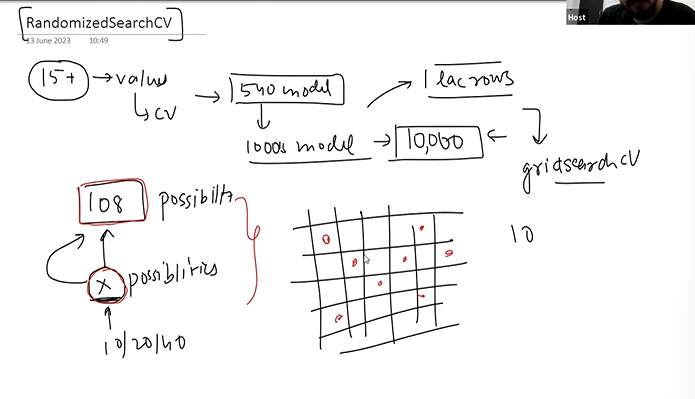

In [36]:
from sklearn.model_selection import RandomizedSearchCV


In [41]:
rcv = RandomizedSearchCV(knn, param_grid, scoring='accuracy', refit = True, cv = kfold, verbose = 2)

In [42]:
rcv.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=12, p=1, weights=distance; total tim

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': [1, 3, 5, 7, 10, 12, 15,
                                                        17, 21],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=2)

In [43]:
rcv.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 12, 'algorithm': 'brute'}

In [44]:
rcv.best_score_

np.float64(0.9419500077627697)

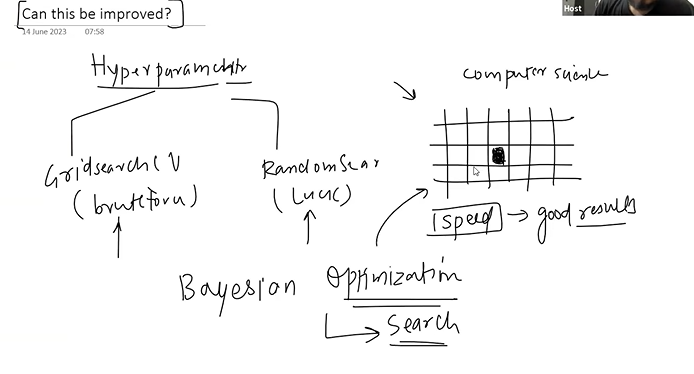

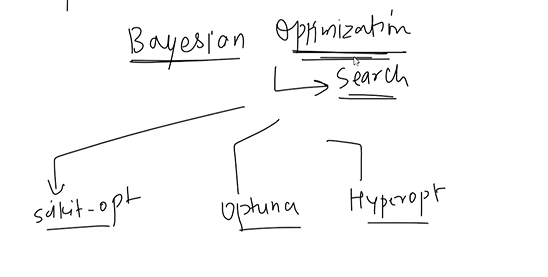

baysian optimization is for advanced optimization